In [ ]:
import nltk
nltk.download('punkt')
import numpy as np
import string
from nltk.util import ngrams
import re
import pickle
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
import math

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_path = "/content/sample_data/train_CM.txt"
train_file = open(train_path, "r")
count=0
train_data=""
tokens=[]
five_grams=[]


for lines in train_file:
  ss = lines.isspace()
  if (not ss):
    lines = lines.replace("<unk>","") 
    # Remove punctuations
    new_line = re.sub("[^a-zA-Z0-9 ]", "", lines).lower().strip()
    # Removing punctuations, converting to lower case
    # new_line = "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"
    train_data += new_line + "\n"
    for i in range(0,len(new_line.split())):
        temp1 = new_line.split()[i]
        tokens.append(temp1)
        if (i < len(new_line.split())-4): 
          temp4 = [new_line.split()[i+j] for j in range(0,5)]
          five_grams.append(temp4)
    count+=1
    if (count>10000): break


train_file.close()

In [ ]:
print(len(train_data.split('\n')))

10002


In [ ]:
tokens.append("UNK")
print(len(set(tokens)))

21196


In [ ]:
# create integer-to-token mapping
int2token = {}

count = 0
for w in set(tokens):
  int2token[count] = w
  count+= 1

# create token-to-integer mapping
token2int = {t: i for i, t in int2token.items()}

print(len(token2int),len(int2token))

21196 21196


In [ ]:
print(token2int)
print(int2token)

{'bando': 0, 'fansa': 1, 'salut': 2, '2010': 3, 'heaaj': 4, 'dene': 5, 'netaaon': 6, 'ikkatha': 7, 'bats': 8, 'krodhit': 9, 'pintu': 10, 'treatment': 11, 'haiin': 12, 'taja': 13, 'huaa': 14, 'raaj': 15, 'indivisual': 16, 'samje': 17, 'gaiye': 18, 'sambhal': 19, 'explain': 20, 'eik': 21, 'bde': 22, 'naksa': 23, 'reason': 24, 'jitina': 25, 'o': 26, 'gunnah': 27, 'zindda': 28, 'ryo': 29, 'politices': 30, 'nadi': 31, 'bhosari': 32, 'keliye': 33, 'dikhaao': 34, 'harkato': 35, 'verma': 36, 'narm': 37, 'bekaabu': 38, 'filmen': 39, 'ta': 40, 'fk': 41, 'talab': 42, 'qke': 43, 'kerwate': 44, 'upas': 45, 'limitations': 46, 'salmaan': 47, 'ram': 48, 'deshk': 49, 'punished': 50, 'hhhh': 51, 'agent': 52, 'lion': 53, 'kazan': 54, 'dhonghi': 55, 'bakray': 56, 'avsarvaadi': 57, 'sidhi': 58, 'dilse': 59, 'bachaane': 60, 'mdm': 61, 'jaid': 62, 'estate': 63, 'tapashya': 64, 'dry': 65, 'pyaari': 66, 'pakindia': 67, 'policy': 68, 'gareebo': 69, 'pahalwan': 70, 'karri': 71, 'pencil': 72, 'laana': 73, 'thnxx'

In [ ]:
vocab_size = len(set(tokens))
print(vocab_size)

21196


In [ ]:
import collections

word_counter = collections.Counter()
for term in tokens:
    word_counter.update({term: 1})

ind=0
for i in word_counter:
  if (word_counter[i]==1): 
    ind+=1

print(ind)

11764


In [ ]:
common_words = word_counter.most_common(vocab_size-10000) # Most common terms
print(word_counter.most_common(100)) 

[('hai', 5277), ('to', 3390), ('ko', 3073), ('ki', 2994), ('me', 2442), ('ka', 2405), ('h', 2359), ('ke', 2249), ('se', 2014), ('ho', 1772), ('nahi', 1625), ('bhi', 1497), ('k', 1486), ('ye', 1442), ('hi', 1431), ('or', 1198), ('aur', 1159), ('kya', 1132), ('he', 1073), ('is', 1048), ('nhi', 1016), ('aap', 954), ('kar', 941), ('koi', 889), ('jo', 774), ('ji', 746), ('ne', 729), ('news', 714), ('liye', 706), ('india', 689), ('ek', 687), ('na', 661), ('modi', 632), ('log', 616), ('tak', 610), ('the', 608), ('aaj', 564), ('kuch', 564), ('par', 557), ('media', 556), ('in', 544), ('tha', 520), ('sab', 519), ('ab', 518), ('do', 505), ('bhai', 495), ('bjp', 493), ('ha', 491), ('desh', 485), ('hain', 475), ('party', 473), ('wo', 454), ('ya', 451), ('chahiye', 450), ('and', 448), ('of', 444), ('kr', 440), ('i', 432), ('raha', 425), ('kiya', 411), ('u', 401), ('hota', 396), ('a', 392), ('rahe', 391), ('tum', 380), ('baat', 374), ('m', 372), ('mai', 371), ('sir', 369), ('wale', 354), ('hoga', 353

In [ ]:
# create inputs and targets (x and y)
x = []
y = []

for s in five_grams:
    x.append(s[:-1])
    y.append(s[1:])

print(x[:10])
print(y[:10])

[['ye', 'to', 'hona', 'hi'], ['to', 'hona', 'hi', 'tha'], ['hona', 'hi', 'tha', 'kabhi'], ['hi', 'tha', 'kabhi', 'kisi'], ['tha', 'kabhi', 'kisi', 'neta'], ['kabhi', 'kisi', 'neta', 'ko'], ['kisi', 'neta', 'ko', 'saja'], ['neta', 'ko', 'saja', 'mili'], ['ko', 'saja', 'mili', 'hi'], ['saja', 'mili', 'hi', 'always']]
[['to', 'hona', 'hi', 'tha'], ['hona', 'hi', 'tha', 'kabhi'], ['hi', 'tha', 'kabhi', 'kisi'], ['tha', 'kabhi', 'kisi', 'neta'], ['kabhi', 'kisi', 'neta', 'ko'], ['kisi', 'neta', 'ko', 'saja'], ['neta', 'ko', 'saja', 'mili'], ['ko', 'saja', 'mili', 'hi'], ['saja', 'mili', 'hi', 'always'], ['mili', 'hi', 'always', 'clean']]


In [ ]:
def get_integer_seq(seq):
  temp=[]
  for w in seq:
    if w in common_words:
      temp.append(token2int[w])
    else:
      temp.append(token2int['UNK'])
  return temp

def get_integer_seq_unk(seq):
  temp=[]
  for w in seq:
    if w in common_words:
      temp.append(token2int[w])
    else:
      if w in token2int: temp.append(token2int[w])
      else: temp.append(token2int['UNK'])
  return temp

# def get_integer_seq(seq):
#     ret = []
#     for w in seq:
#         if w in token2int:
#             ret.append(token2int[w])
#         else:
#             ret.append(token2int['UNK'])
    
#     return ret


In [ ]:
# convert text sequences to integer sequences
x_int_ = [get_integer_seq(i) for i in x]
x_int_unk = [get_integer_seq_unk(i) for i in x]
y_int_ = [get_integer_seq(i) for i in y]
y_int_unk = [get_integer_seq_unk(i) for i in y]

# convert lists to numpy arrays
x_int = np.array(x_int_+x_int_unk)
y_int = np.array(y_int_+y_int_unk)

In [ ]:
print(x_int.shape,y_int.shape)
print(x_int[10:],y_int[10:])

(310314, 4) (310314, 4)
[[13239 13239 13239 13239]
 [13239 13239 13239 13239]
 [13239 13239 13239 13239]
 ...
 [18540 16955 11681 15853]
 [16955 11681 15853  7038]
 [11681 15853  7038  3819]] [[13239 13239 13239 13239]
 [13239 13239 13239 13239]
 [13239 13239 13239 13239]
 ...
 [16955 11681 15853  7038]
 [11681 15853  7038  3819]
 [15853  7038  3819  7038]]


In [ ]:
print(token2int['UNK'])

13239


In [ ]:
def get_batches(arr_x, arr_y, batch_size): 
    # iterate through the arrays
    prv = 0
    for n in range(batch_size, arr_x.shape[0], batch_size):
      x = arr_x[prv:n,:]
      y = arr_y[prv:n,:]
      prv = n
      yield x, y

In [ ]:
class WordLSTM(nn.Module):
    def __init__(self, n_hidden=256, n_layers=4, drop_prob=0.3, lr=0.001):
        super().__init__()

        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.lr = lr
        
        self.emb_layer = nn.Embedding(vocab_size, 200)

        ## define the LSTM
        self.lstm = nn.LSTM(200, n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        ## define a dropout layer
        self.dropout = nn.Dropout(drop_prob)
        
        ## define the fully-connected layer
        self.fc = nn.Linear(n_hidden, vocab_size)      
    
    def forward(self, x, hidden):
        ''' Forward pass through the network. 
            These inputs are x, and the hidden/cell state `hidden`. '''

        ## pass input through embedding layer
        embedded = self.emb_layer(x)     
        
        ## Get the outputs and the new hidden state from the lstm
        lstm_output, hidden = self.lstm(embedded, hidden)
        
        ## pass through a dropout layer
        out = self.dropout(lstm_output)
        
        #out = out.contiguous().view(-1, self.n_hidden) 
        out = out.reshape(-1, self.n_hidden) 

        ## put "out" through the fully-connected layer
        out = self.fc(out)

        # return the final output and the hidden state
        return out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        # if GPU is available
        if (torch.cuda.is_available()):
          hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda(),
                    weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda())
        
        # if GPU is not available
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
                    weight.new(self.n_layers, batch_size, self.n_hidden).zero_())
        
        return hidden

In [ ]:
# instantiate the model
net = WordLSTM()

# push the model to GPU (avoid it if you are not using the GPU)
net.cuda()

print(net)

WordLSTM(
  (emb_layer): Embedding(21196, 200)
  (lstm): LSTM(200, 256, num_layers=4, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=21196, bias=True)
)


In [ ]:
def train(net, epochs=10, batch_size=32, lr=0.001, clip=1, print_every=32, xx=x_int, yy=y_int):
    
    # optimizer
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    
    # loss
    criterion = nn.CrossEntropyLoss()
    
    # push model to GPU
    net.cuda()
    
    counter = 0

    net.train()
    for e in range(epochs):

        # initialize hidden state
        h = net.init_hidden(batch_size)

        for x, y in get_batches(xx, yy, batch_size):
            counter+= 1
            # convert numpy arrays to PyTorch arrays
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            
            # push tensors to GPU
            inputs, targets = inputs.cuda(), targets.cuda()

            # detach hidden states
            h = tuple([each.data for each in h])

            # zero accumulated gradients
            net.zero_grad()
            
            # get the output from the model
            output, h = net(inputs, h)
            
            # calculate the loss and perform backprop
            loss = criterion(output, targets.view(-1))

            # store loss of each epoch
            losses.append(loss)

            # back-propagate error
            loss.backward()

            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)

            # update weigths
            opt.step()            
            
            if counter % print_every == 0:
            
                print("Epoch: {}/{}...".format(e+1, epochs), 
                      "Step: {}...".format(counter))

In [ ]:
losses=[]
# train the model
train(net, batch_size = 32, epochs=15, print_every=256)

Epoch: 1/15... Step: 256...
Epoch: 1/15... Step: 512...
Epoch: 1/15... Step: 768...
Epoch: 1/15... Step: 1024...
Epoch: 1/15... Step: 1280...
Epoch: 1/15... Step: 1536...
Epoch: 1/15... Step: 1792...
Epoch: 1/15... Step: 2048...
Epoch: 1/15... Step: 2304...
Epoch: 1/15... Step: 2560...
Epoch: 1/15... Step: 2816...
Epoch: 1/15... Step: 3072...
Epoch: 1/15... Step: 3328...
Epoch: 1/15... Step: 3584...
Epoch: 1/15... Step: 3840...
Epoch: 1/15... Step: 4096...
Epoch: 1/15... Step: 4352...
Epoch: 1/15... Step: 4608...
Epoch: 1/15... Step: 4864...
Epoch: 1/15... Step: 5120...
Epoch: 1/15... Step: 5376...
Epoch: 1/15... Step: 5632...
Epoch: 1/15... Step: 5888...
Epoch: 1/15... Step: 6144...
Epoch: 1/15... Step: 6400...
Epoch: 1/15... Step: 6656...
Epoch: 1/15... Step: 6912...
Epoch: 1/15... Step: 7168...
Epoch: 1/15... Step: 7424...
Epoch: 1/15... Step: 7680...
Epoch: 1/15... Step: 7936...
Epoch: 1/15... Step: 8192...
Epoch: 1/15... Step: 8448...
Epoch: 1/15... Step: 8704...
Epoch: 1/15... St

In [ ]:
torch.save(net, '/content/sample_data/model1')

In [ ]:
print(losses[0].item())

10.014262199401855


In [ ]:
import pandas as pd
data = {
    'Epoch': [i for i in range(1,16)]
}

temp = []
for i in range(0,15):
  temp.append(losses[i].item())

data['Loss']= [i for i in temp]
df = pd.DataFrame(data,columns=['Epoch','Loss'])
print (df)

    Epoch       Loss
0       1  10.014262
1       2   9.935634
2       3   9.792228
3       4   9.507201
4       5   8.856390
5       6   7.492183
6       7   5.643476
7       8   4.150183
8       9   3.027712
9      10   2.068702
10     11   1.344823
11     12   0.806241
12     13   0.478388
13     14   0.284027
14     15   0.147454


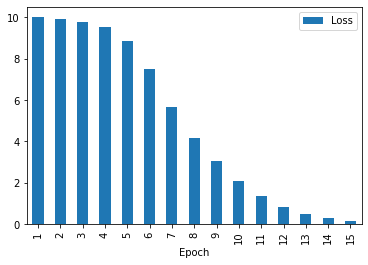

In [ ]:
df.plot(x ='Epoch', y='Loss', kind = 'bar')

In [ ]:
# predict next token
def predict_prob(net, tkn, trg, h=None):
            
    # tensor inputs
    if tkn in token2int:
      x = np.array([[token2int[tkn]]])
    else:
      x = np.array([[token2int['UNK']]])

    inputs = torch.from_numpy(x)

    # push to GPU
    inputs = inputs.cuda()

    # detach hidden state from history
    h = tuple([each.data for each in h])

    # get the output of the model
    out, h = net(inputs, h)

    # get the token probabilities
    p = F.softmax(out, dim=1).data

    p = p.cpu()

    p = p.numpy()
    p = p.reshape(p.shape[1],)

    if trg in token2int:
        prob = p[token2int[trg]]
    else:
        prob = p[token2int['UNK']]

    return h, prob


# function to calculate perplexity
def get_prob(net, x, y):

    # push to GPU
    net.cuda()

    net.eval()

    # batch size is 1
    h = net.init_hidden(1)

    N = len(x)
    tmp = 1

    for i, gram in enumerate(x):
        h, prob = predict_prob(net, gram, y[i], h)
        if (i==0): 
          if (gram in word_counter): tmp*= word_counter[gram]/vocab_size
          else: tmp*= ind/vocab_size   
        else:
          tmp *= prob
        # print(gram,prob,tmp)

    return math.log(tmp)


def get_perp(prob,n):
  p = math.exp(prob*(1/n))
  return 1/p
  # return prob**(-1/n)


In [ ]:
print(word_counter['UNK'])

10000


In [ ]:
word_counter['UNK'] = 10000

In [ ]:
train_path = "/content/sample_data/train_CM.txt"
train_file = open(train_path, "r")
count=0
perp=0
avg_perp=0

for lines in train_file:   
  if (count>10000): break
  ss = lines.isspace()
  if (not ss):
    lines = lines.replace("<unk>","")
    new_line = re.sub("[^a-zA-Z0-9 ]", "", lines).lower().strip()
    # new_line = "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"
    output=0
    # print(new_line)
    for i in range(0,len(new_line.split())):
      test_x=[]
      test_y=[]
      if (i < len(new_line.split())-4): 
          temp = [new_line.split()[i+j] for j in range(0,5)]
          temp_x = temp[:-1]
          temp_y = temp[1:]
          test_x = get_integer_seq(temp_x)
          test_y = get_integer_seq(temp_y)
          output += get_prob(net, test_x, test_y)
          # print("5 gram",output)
    if len(new_line.split())!=0:
      perp = get_perp(output,len(new_line.split()))
      # print("perp",perp)
    avg_perp+=perp
    count+=1

train_file.close()
avg_perp = avg_perp/count
print("avg perp",avg_perp)

avg perp 1.511138787017082


In [ ]:
test_path = "/content/sample_data/test_CM.txt"
test_file = open(test_path, "r")
count=0
test_data=""
perp=0
avg_perp=0

for lines in test_file:
  # if(count>100): break
  ss = lines.isspace()
  if (not ss):
    lines = lines.replace("<unk>","")
    new_line = re.sub("[^a-zA-Z0-9 ]", "", lines).lower().strip()
    # new_line = "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"
    output=0
    for i in range(0,len(new_line.split())):
      test_x=[]
      test_y=[]
      if (i < len(new_line.split())-4): 
          temp = [new_line.split()[i+j] for j in range(0,5)]
          temp_x = temp[:-1]
          temp_y = temp[1:]
          test_x = get_integer_seq(temp_x)
          test_y = get_integer_seq(temp_y)
          output += get_prob(net, test_x, test_y)
    perp = get_perp(output,len(new_line.split()))
    avg_perp+=perp
    count+=1

test_file.close()
avg_perp = avg_perp/count
print(avg_perp)

1.513985439644699


In [ ]:
# predict next token
def predict(net, tkn, h=None):
         
  # tensor inputs
  if tkn in token2int:
      x = np.array([[token2int[tkn]]])
  else:
      x = np.array([[token2int['UNK']]])
  inputs = torch.from_numpy(x)
  
  # push to GPU
  inputs = inputs.cuda()

  # detach hidden state from history
  h = tuple([each.data for each in h])

  # get the output of the model
  out, h = net(inputs, h)

  # get the token probabilities
  p = F.softmax(out, dim=1).data

  p = p.cpu()

  p = p.numpy()
  p = p.reshape(p.shape[1],)

  # get indices of top 3 values
  top_n_idx = p.argsort()[-3:][::-1]

  sampled_token_index = token2int['UNK']
  while int2token[sampled_token_index]=='UNK':
    # randomly select one of the three indices
    sampled_token_index = top_n_idx[random.sample([0,1,2],1)[0]]

  # return the encoded value of the predicted char and the hidden state
  return int2token[sampled_token_index], h
  
# function to generate text
def sample(net, size, prime='it is'):
        
    # push to GPU
    net.cuda()
    
    net.eval()

    # batch size is 1
    h = net.init_hidden(1)

    toks = prime.split()

    # predict next token
    for t in prime.split():
      token, h = predict(net, t, h)
    
    toks.append(token)

    # predict subsequent tokens
    for i in range(size-1):
        token, h = predict(net, toks[-1], h)
        toks.append(token)

    return ' '.join(toks)

In [ ]:
i=0
while (i!=4):
  i+=1
  print(sample(net, 5, prime="life me"))

life me bhi hai to to to
life me bhi to koi nahi hota
life me koi bhi news nahi hota
life me to koi kam nhi hai
